<a href="https://colab.research.google.com/github/ai-pallikoodam/pytorch-home/blob/main/03_Pytorch_Workflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
what_were_covering = {1: "data (prepare and load)",
		      2: "build model",
		      3: "fitting the model to data (training)",
		      4: "making predictions and evaluating a model (inference)",
		      5: "saving and loading a model",
		      6: "putting it all together"
		      }
what_were_covering

{1: 'data (prepare and load)',
 2: 'build model',
 3: 'fitting the model to data (training)',
 4: 'making predictions and evaluating a model (inference)',
 5: 'saving and loading a model',
 6: 'putting it all together'}

In [2]:
import torch
from torch import nn
import matplotlib.pyplot as plt

torch.__version__

'1.12.0+cu113'

## 1. data (prepare and load)

In [3]:
weight = 0.7
bias = 0.3

start = 0
end = 1
step = 0.02

X = torch.arange(start, end, step).unsqueeze(dim=1)
y = weight * X + bias

In [4]:
X[:10], y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]), tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [5]:
len(X), len(y)

(50, 50)

## 2. Splitting data

In [6]:
train_split = int(0.8 * len(X))
train_split

40

In [7]:
# training set, validation set, test set
train_split = int(0.8 * len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

In [8]:
X_train[:5], y_train[:5]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800]]), tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560]]))

## 3. Visualize

In [9]:
def plot_predictions(train_data=X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=None
                    ):
    plt.figure(figsize=(10, 7))
    plt.scatter(train_data, train_labels, c="b", s=4, label="Training data")
    plt.scatter(test_data, test_labels, c="g", s=4, label= "Testing data")
    if predictions is not None:
        plt.scatter(test_data, predictions, c="r", s=4, label= "Predictions")
    plt.legend(prop={"size": 14});

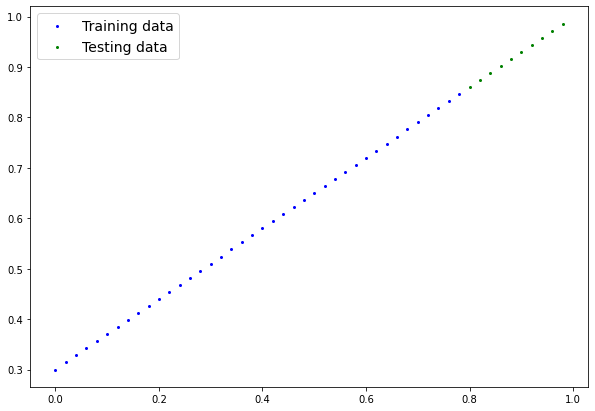

In [10]:
plot_predictions();

## 4. Build a PyTorch Model

In [11]:
class LinearRegressionModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.weights = nn.Parameter(torch.randn(1, requires_grad=True, dtype=torch.float))
        self.bias = nn.Parameter(torch.randn(1, requires_grad=True, dtype=torch.float))
    def forward(self, x: torch.Tensor) -> torch.Tensor:
        return self.weights * x + self.bias

In [12]:
class LinearRegressionModelV2(nn.Module):
	def __init__(self):
		super().__init__()
		self.linear_layer = nn.Linear(in_features=1,out_features=1)
	def forward(self, x: torch.Tensor) -> torch.Tensor:
		return self.linear_layer(x)

## Checking the contents of our PyTorch Model

In [13]:
# Create a random seed
torch.manual_seed(42)

# Create an instance of the model (this is a subclass of nn.Module)
#model_0 = LinearRegressionModel()
model_0 = LinearRegressionModelV2()

In [14]:
# Check out the parameters
list(model_0.parameters())

[Parameter containing:
 tensor([[0.7645]], requires_grad=True), Parameter containing:
 tensor([0.8300], requires_grad=True)]

In [15]:
# List names parameters
model_0.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.7645]])),
             ('linear_layer.bias', tensor([0.8300]))])

In [16]:
weight, bias

(0.7, 0.3)

In [17]:
## Making prediction using torch.inference_mode()
with torch.inference_mode():
	y_preds = model_0(X_test)

In [18]:
X_test[:5], y_preds[:5]

(tensor([[0.8000],
         [0.8200],
         [0.8400],
         [0.8600],
         [0.8800]]), tensor([[1.4416],
         [1.4569],
         [1.4722],
         [1.4875],
         [1.5028]]))

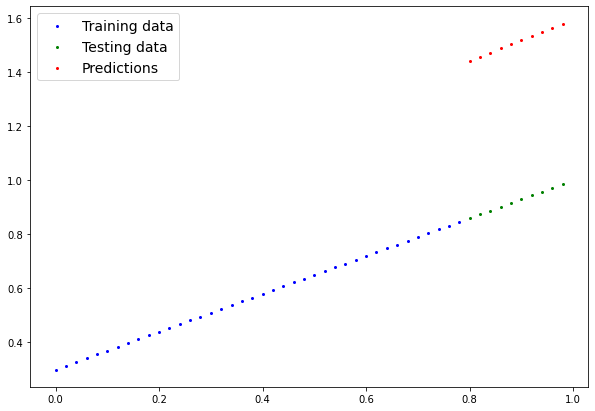

In [19]:
plot_predictions(predictions=y_preds)

## 4. Train Model

In [20]:
# Setup a loss function
loss_fn = nn.L1Loss()

In [21]:
# Setup an optimizer
optimizer = torch.optim.SGD(model_0.parameters(),lr=0.01)

In [22]:
# Setup a training loss
epoch_count = []
loss_values = []
test_loss_values = []

epochs = 160
# 1. Loop through the data
for epoch in range(epochs):
    # Set the model to training mode
    model_0.train()
    # 2. Forward pass
    y_pred = model_0(X_train)
    # 3. Calculate the loss
    loss = loss_fn(y_pred, y_train)
    # print(f"Loss : {loss}")
    # 4. Optimizer zero grad
    optimizer.zero_grad()
    # 5. Loss backward
    loss.backward()
    # 6. Optimizer step
    optimizer.step()
    # Print out what's happening
    
    
    with torch.inference_mode(): #or .no_grad()
        # 0. Set the model to evaluation mode
        model_0.eval()

        # 1. Do the forward pass
        test_pred = model_0(X_test)

        # 2. Calculate the loss
        test_loss = loss_fn(test_pred, y_test)
        # print(f"Train Loss: {loss} | Test loss: {test_loss}")
    
    if epoch % 10 == 0:
        epoch_count.append(epoch)
        loss_values.append(loss)
        test_loss_values.append(test_loss)
        print(f"Epoch: {epoch} | Loss: {loss} | Test loss: {test_loss}")

Epoch: 0 | Loss: 0.5551779866218567 | Test loss: 0.5739762187004089
Epoch: 10 | Loss: 0.4399680495262146 | Test loss: 0.4392663538455963
Epoch: 20 | Loss: 0.3247582018375397 | Test loss: 0.30455657839775085
Epoch: 30 | Loss: 0.20954827964305878 | Test loss: 0.16984674334526062
Epoch: 40 | Loss: 0.09433844685554504 | Test loss: 0.03513689711689949
Epoch: 50 | Loss: 0.023886386305093765 | Test loss: 0.04784906655550003
Epoch: 60 | Loss: 0.0199567973613739 | Test loss: 0.04580312222242355
Epoch: 70 | Loss: 0.016517987474799156 | Test loss: 0.0375305712223053
Epoch: 80 | Loss: 0.013089170679450035 | Test loss: 0.029944902285933495
Epoch: 90 | Loss: 0.009653178043663502 | Test loss: 0.02167237363755703
Epoch: 100 | Loss: 0.006215679459273815 | Test loss: 0.014086711220443249
Epoch: 110 | Loss: 0.002787243574857712 | Test loss: 0.005814164876937866
Epoch: 120 | Loss: 0.0012645035749301314 | Test loss: 0.013801807537674904
Epoch: 130 | Loss: 0.0012645035749301314 | Test loss: 0.01380180753767

In [23]:
import numpy as np

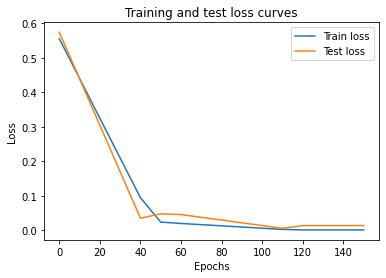

In [24]:

# Plot the loss curves
plt.plot(epoch_count, np.array(torch.tensor(loss_values).numpy()), label="Train loss")
plt.plot(epoch_count, np.array(torch.tensor(test_loss_values).numpy()) , label="Test loss")
plt.title("Training and test loss curves")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend();

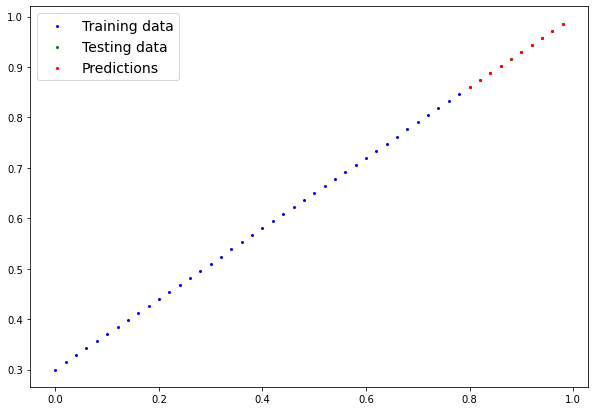

In [25]:
# Predictions
with torch.inference_mode():
	y_preds_new = model_0(X_test)

plot_predictions(predictions=y_preds_new)

# Evaluate Model 0

In [26]:
with torch.inference_mode(): #or .no_grad()
    # 0. Set the model to evaluation mode
    model_0.eval()

    # 1. Do the forward pass
    test_pred = model_0(X_test)

    # 2. Calculate the loss
    test_loss = loss_fn(test_pred, y_test)
    print(f"Train Loss: {loss} | Test loss: {test_loss}")

Train Loss: 0.010256484150886536 | Test loss: 0.0003308236482553184


## 5. Saving a model in PyTorch

In [27]:
model_0.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.6968]])),
             ('linear_layer.bias', tensor([0.3025]))])

In [28]:
from pathlib import Path

# 1. Create models directory
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

# 2. Create model save path
MODEL_NAME="01_pytorch_workflow_model_0.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

MODEL_SAVE_PATH

# 3. Save the model state dict
print(f"Saving model to : {MODEL_SAVE_PATH}")
torch.save(obj=model_0.state_dict(),
	   f=MODEL_SAVE_PATH)

Saving model to : models/01_pytorch_workflow_model_0.pth
